# Qiskit 6 - 2020/2021

&nbsp;

## Contents

&nbsp;
1. [Simon's Algorithm](#simon)

2. [Quantum Fourier Transform](#qft)

&nbsp;

#### Module imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

from qiskit.tools.visualization import plot_histogram

#IBMQ.load_account()

import math
from math import pi

# 1. [Simon's Algorithm](https://qiskit.org/textbook/ch-algorithms/simon.html) <a id='simon'></a>

 
&nbsp;

## The problem 

Let $f$ be a blackbox function, $f:\{0,1\}^n \rightarrow \{0,1\}^n$.

$$ f(x) = f(y) \mbox{ iff } x=y \mbox{ or } x= y \oplus s$$

Find $s$.

<img src="https://qiskit.org/textbook/ch-algorithms/images/simon_steps.jpeg" width="300 px" align="center"></img>


**Exercise:** Implement

n = 2 and s = 11


Two n-qubit input registers are initialized to the zero state: 
$$ |\psi_1 \rangle = |0\rangle ^{\otimes n}|0\rangle ^{\otimes n} = |00\rangle_1 |00\rangle_2 $$

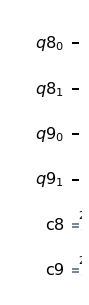

In [14]:
n = 2

qr1 = QuantumRegister(n)
qr2 = QuantumRegister(n)
cr1 = ClassicalRegister(n)
cr2 = ClassicalRegister(n)

simon = QuantumCircuit(qr1,qr2,cr1,cr2)

simon.draw(output='mpl')

 Apply a Hadamard transform to the first register: 
 $$ |\psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum _{x \in \{0,1\}^n } |x\rangle|0\rangle ^{\otimes n}$$
 
 $$\frac{1}{\sqrt{2}} ( |00\rangle_1 + | 01\rangle_1 + |10\rangle_1 + |11\rangle_1 )|00\rangle_2$$

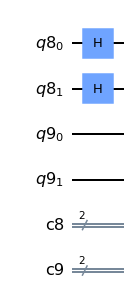

In [15]:
simon.h(qr1)

simon.draw(output='mpl')

Appy oracle:
 $$ |\psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum _{x \in \{0,1\}^n } |x\rangle|f(x)\rangle $$
 
 
 $$\frac{1}{2} ( |00\rangle_1| 00\rangle_2 + | 10\rangle_1 |11\rangle_2 + |10\rangle_1|11\rangle_2 +| 11\rangle |00\rangle_2)$$

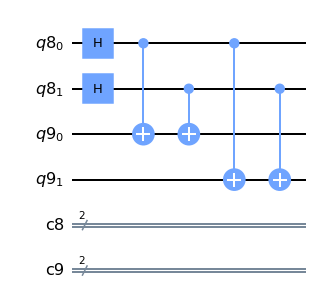

In [16]:
simon.cx(qr1[0],qr2[0])
simon.cx(qr1[1],qr2[0])
simon.cx(qr1[0],qr2[1])
simon.cx(qr1[1],qr2[1])

simon.draw(output='mpl')

Measure the second register. 

$$ |\psi_4 \rangle = \frac{1}{\sqrt{2}}(|x\rangle + |y\rangle )$$

For instance, if the measument is $11$ then:
 $$\frac{1}{\sqrt{2}} ( |01 \rangle_1 + |10 \rangle_1)$$

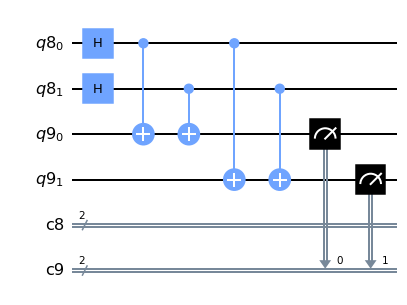

In [17]:
simon.measure(qr2,cr2)

simon.draw(output='mpl')

Apply Hadamard on the first register:

$$|\psi_5 \rangle =\frac{1}{\sqrt{2^{n+1}}}\sum_{z \in\{ 0,1\}^n}((-1)^{x\cdot z}+(-1)^{y \cdot z}) | z \rangle $$

$$ \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle )$$

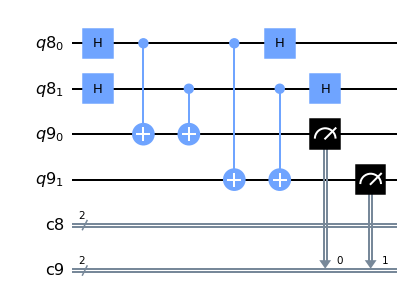

In [18]:
simon.h(qr1)

simon.draw(output='mpl')

Measuring the first register

$$(-1)^{x \cdot z} = (-1)^{y \cdot z}$$

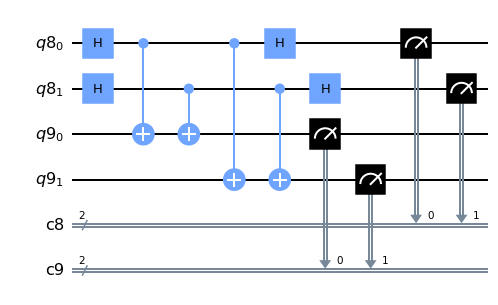

In [19]:
simon.measure(qr1,cr1)

simon.draw(output='mpl')

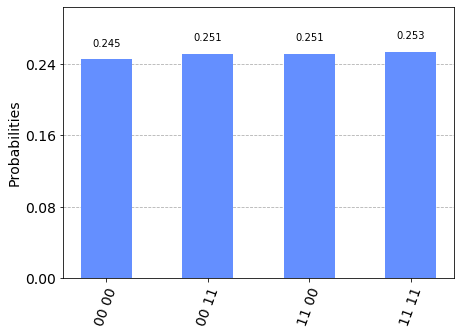

In [22]:
#Final measurements

sim = Aer.get_backend("qasm_simulator")
job = execute(simon, sim, shots=1000)
plot_histogram(job.result().get_counts())


## . Quantum Fourier Transform<a id='qft'></a>

&nbsp;

The quantum Fourier transform is analogue to the discrete Fourier transform (DFT). Similarly to the classical case, it is a very useful mathematical tool, and a building block in many quantum algorithms, such as quantum phase estimation, computing the discrete logarithm, and Shor's algorithm for factoring.

&nbsp;

### (Classical) Fourier Transform

In modern science and engineering, the Fourier transform is essential for signal processing and communications.

The FT allows us to extract the underlying periodic behaviour of a function, by decomposing it into its constituent frequencies.

&nbsp;

<div class="alert alert-block alert-info">

**Example: Fourier transform for signal processing**

&nbsp;

<img src="https://terpconnect.umd.edu/~toh/spectrum/iFilterAnimation.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">

<sup>**a)** Take a sinusoidal signal with high frequency noise; **b)** Apply the Fourier transform, getting a frequency spectrum; **c)** Apply the inverse Fourier transform to give a clean set of data.</sup>

</div>

&nbsp;

### Discrete Fourier Transform

The DFT is a version of the Fourier transform that works on discrete data sets.

The discrete Fourier transform, $\tilde{f}$ of a discrete function, $f = f_1 , \cdots, f_N$ is given by

$$ \tilde{f}_k \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{2\pi ijk/N} f_j$$

The inverse Fourier transform is expressed as

$$ f_j \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{-2\pi ijk/N} \tilde{f}_k$$

With $f_j$ and $\tilde{f}_k$ being complex numbers, and indices $j, k \in \{0, 1, \cdots, N-1\}$

&nbsp;
    

### Quantum Fourier tranform

Qubit states are represented by vectors of complex numbers, so it makes sense that the DFT can be applied to them.

Given a state vector:

$$ | \psi \rangle = \sum^{N-1}_{j=0} a_j |j\rangle = \begin{pmatrix}
a_0\\ 
\vdots\\ 
a_{N-1}
\end{pmatrix}$$

The DFT (which we will now call the quantum Fourier transform, or QFT) can be computed over the _amplitudes_ of the quantum state

$$ \sum_j \alpha_j |j\rangle \rightarrow \sum_k \tilde{\alpha}_k |k \rangle$$ where:

$$\tilde{\alpha}_k \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{2\pi ijk/N} \alpha_k$$

&nbsp;

We observe that the amplitudes $\tilde{\alpha}_k$ are linear in the original $\alpha_j$. So there is a linear operator $\hat{F}$ which implements the transform.

We can write the matrix $\hat{F}$ in outer product notation:

&nbsp;

$$\hat{F} = \sum_{j,k=0}^{N-1} \frac{e^{2\pi ijk/N}}{\sqrt{N}} |k \rangle \langle j |$$

&nbsp;

The Fourier transform lets us define a new basis $|\hat{x}\rangle = \hat{F}|x\rangle$, where $\{ |x\rangle\}$ is the usual computational basis - every vector $|\hat{x}\rangle$ is an equally weighted superposition of all the computational basis states.

&nbsp;

<div class="alert alert-block alert-info">
    
**Position and Momentum**: 

&nbsp;

* From earlier classes, recall the change of basis for a single-qubit state. What operation may be performed to change it between the computational and superposition basis?

&nbsp;

* The Hadamard transform also turns computational basis states into equally weighted superpositions of all states. But it leaves all amplitudes real, while the amplitudes of $| \tilde{x}\rangle$ are complex. And it is its own inverse, while $\hat{F} \neq \hat{F}^\dagger$

&nbsp;

* In physics, the relationship of this basis to the computational basis is analogous to that between the _momentum_ and _position_ bases of a particle.

    
</div>

### QFT in the quantum circuit model of computation

&nbsp;

For the case of $n$ qubits, the vector describing a quantum state has dimension $N=2^n$. Since the QFT is an unitary operator, it can be implemented in a quantum circuit. Although there is no guarantee that such a circuit would be efficient (i.e. would not scale exponentially with the number of qubits), an efficient circuit _does_ exist.

&nbsp;

The key is to notice that the states $| \hat{j} \rangle$ can be written in a product form:

* Let the binary expression for $j$ be $j_1 j_2 \cdots j_n$, where:

$$ j = j_1 2^{n-1} \, +\, j_2 2^{n-2} \,+\, \cdots \,+\, j_n$$

* Admit the following notation for binary fractions:

$$ 0.j_1 j_2 \cdots j_n = j_1 /2 + j_2 /4 + \cdots + j_n /2^n$$

* Then the state $|\hat{j} \rangle$ can be written as:

$$ |\hat{j} \rangle  = \frac{1}{2^n/2} (|0\rangle + e^{2\pi i 0.j_n }| 1\rangle) \, \otimes \, (|0\rangle + e^{2\pi i 0.j_{n-1}j_n }| 1\rangle) \, \otimes \, \cdots \, \otimes \, (|0\rangle + e^{2\pi i 0.j_1j_2\cdots j_n }| 1\rangle)$$

&nbsp;

A unitary that performs the transformation

$$ |0\rangle \rightarrow \frac {1}{\sqrt{2}}(|0\rangle + e^{i\theta}|1\rangle) \; ;\; |1\rangle \rightarrow \frac {1}{\sqrt{2}}(|0\rangle - e^{i\theta}|1\rangle)$$

may be decomposed into an Hadamard gate followed by a $Z$-rotation by $\theta$.

**However**, in the expression above, the rotation depends on the values of other bits. We can expect to build the QFT out of Hadamards and controlled-phase rotation gates.

&nbsp;

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/Q_fourier_nqubits.png/1920px-Q_fourier_nqubits.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="700 px" align="center">

&nbsp;



<div class="alert alert-block alert-danger">

**Attention**

* In the figure above, notice the order of the input qubits (in comparison with Qiskit's circuit drawer);

* Notice how after the QFT, the qubits of the transformed state are in reverse order. What can be done to correct this?

</div>

&nbsp;

<div class="alert alert-block alert-info">
    
**Controlled phase rotation in Qiskit**

In Qiskit, the phase rotation gate, $u1(\lambda)$, is defined as:

$$u1(\lambda) = \begin{pmatrix} 1 & 0\\ 0 & e^{i\lambda} \end{pmatrix}$$

Admit $\lambda = 2\pi/2^k$ so that we can define a rotation operator:

$$R_k = \begin{pmatrix} 1 & 0\\ 0 & e^{2\pi i /2^k} \end{pmatrix}$$

The controlled-$R_k$ gate performs this rotation only if a control qubit is $|1\rangle$ rather than $|0\rangle$:

$$CR_k = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & e^{2\pi i /2^k} \end{pmatrix}$$


&nbsp;

A controlled-$u1$ gate may be implemented in Qiskit with the instruction `cp(theta, ctrl, trg)`.
</div>

In [4]:
# Plot results
def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

# Execute circuit, display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: \n\n", result_counts)
    show_results(result_counts)

<div class="alert alert-block alert-warning">

**Exercise - implementing the QFT**

&nbsp;

1. Implement a function `qftransform (circuit, qr, swap=True)` to perform the QFT over a register `qr`. The function should be able to ignore the swapping operations at the end when called with `swap=False`.

&nbsp;

2. How many controlled-$R_k$ gates are performed as a function of qubit number $n$? Does the circuit scale efficiently?

</div>

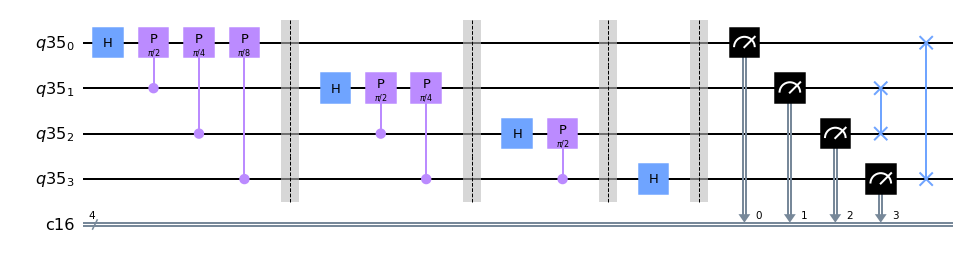

In [34]:
def qftransform(circuit, qr, cr, swap=True):
    n = len(qr)
    for i in range(n):
        circuit.h(qr[i])
        for j in range(i+1,n):
            circuit.cp(2*np.pi / 2**(j-i+1), qr[j], qr[i])
        circuit.barrier()
    circuit.measure(qr,cr)
    
    if swap==True:
        for i in range(n//2):
            circuit.swap(qr[i],qr[n-i-1])

            
qr=QuantumRegister(4)
cr=ClassicalRegister(4)
qc=QuantumCircuit(qr,cr)

qftransform(qc, qr, cr)

qc.draw(output='mpl', scale=1)

**Ref**

* [ Shor's Algorithm I: Understanding Quantum Fourier Transform, Quantum Phase Estimation - Part 1](https://www.youtube.com/watch?v=mAHC1dWKNYE)
* [ Shor's Algorithm I: Understanding Quantum Fourier Transform, Quantum Phase Estimation - Part 2](https://www.youtube.com/watch?v=pq2jkfJlLmY)

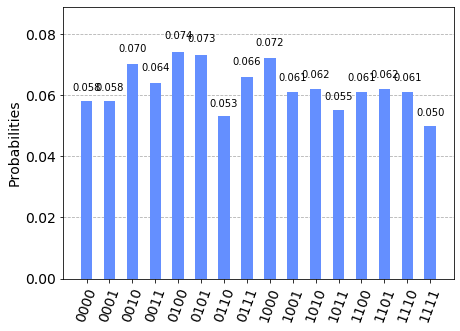

In [35]:
sim = Aer.get_backend("qasm_simulator")
job = execute(qc, sim, shots=1000)
plot_histogram(job.result().get_counts())